# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

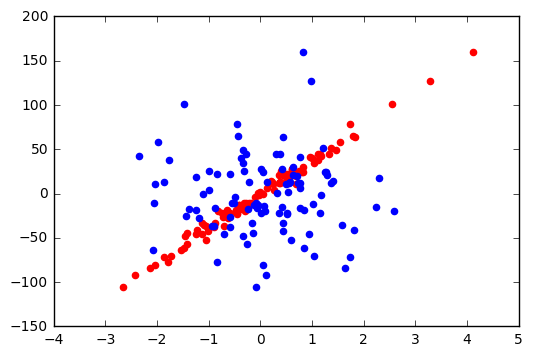

In [4]:
pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
pylab.scatter(map(lambda x:x[1], data), target, color = 'b')

In [5]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [6]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [7]:
print test_labels

[ -26.87743177  -57.46293828   64.70214251   20.87713077  -48.28700118
  101.14760598    5.86887774   14.76930132   28.15553021   11.96165156
  -36.44717565    1.72644759   27.83791274  -12.0017312   -35.32062686
  -32.71074998  -16.79027112   49.41686419  160.09441244   23.87701013
  -52.37232463  -45.38589148  -15.01435792  -16.85466265  -24.77820218
  -13.99339669   41.95683853   -4.38652971  126.64909941  -70.11132234]


In [8]:
print predictions

[ -28.53200247  -55.08620532   67.32930263   13.05948203  -56.43711539
   95.83381432    4.17429544    7.4509894    22.06713188   13.3434277
  -41.57467801   -0.66812312   22.55697446   -7.4750874   -42.17551079
  -43.92819322  -15.23276618   54.97274428  156.14435754   31.05607184
  -41.10863609  -44.41010885  -10.28362862  -16.81081713  -27.27398017
  -15.40179921   42.98510462   -5.43096556  124.58553151  -66.76364498]


In [9]:
metrics.mean_absolute_error(test_labels, predictions)

4.2156581579513883

In [10]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'mean_absolute_error', 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: -4.07007149878, std: 1.07371044929


In [11]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [12]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: 4.07007149878, std: 1.07371044929


In [13]:
coef

array([ 38.07925837,   0.        ])

In [14]:
linear_regressor.coef_

array([ 38.14013963,   0.38290787])

In [15]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.87616649006508318

In [16]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [17]:
print "y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_)

y = 38.14*x1 + 0.38*x2 + -0.88


#### Lasso

In [18]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [19]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std())

mean: 4.15447824667, std: 1.0170354385


In [20]:
print lasso_regressor.coef_

[ 37.09738171   0.        ]


In [21]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [22]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])

y = 37.10*x1 + 0.00*x2
